# Q1: OR and AND GATE

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias > 0, 1, 0)

# OR gate training data
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# AND gate training data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Train OR perceptron
or_perceptron = Perceptron()
or_perceptron.train(X_or, y_or)

# Train AND perceptron
and_perceptron = Perceptron()
and_perceptron.train(X_and, y_and)

# Test OR perceptron
print("OR Gate Predictions:")
print("0 OR 0:", or_perceptron.predict(np.array([[0, 0]])))
print("0 OR 1:", or_perceptron.predict(np.array([[0, 1]])))
print("1 OR 0:", or_perceptron.predict(np.array([[1, 0]])))
print("1 OR 1:", or_perceptron.predict(np.array([[1, 1]])))

# Test AND perceptron
print("\nAND Gate Predictions:")
print("0 AND 0:", and_perceptron.predict(np.array([[0, 0]])))
print("0 AND 1:", and_perceptron.predict(np.array([[0, 1]])))
print("1 AND 0:", and_perceptron.predict(np.array([[1, 0]])))
print("1 AND 1:", and_perceptron.predict(np.array([[1, 1]])))


OR Gate Predictions:
0 OR 0: [0]
0 OR 1: [1]
1 OR 0: [1]
1 OR 1: [1]

AND Gate Predictions:
0 AND 0: [0]
0 AND 1: [0]
1 AND 0: [0]
1 AND 1: [1]


# Q2:Dataet analysis

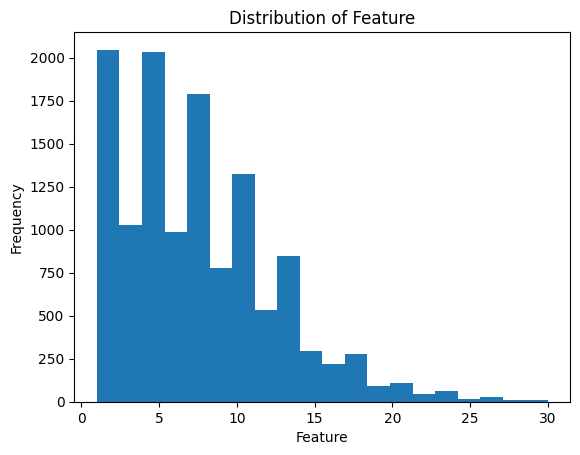

Class Counts:
57    1082
60    1048
54     996
63     905
53     812
      ... 
59       1
72       1
68       1
56       1
65       1
Name: label, Length: 79, dtype: int64


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier

# Step 1: Load the dataset
data = pd.read_csv('horseRacing.csv')

# Step 2: Clean the dataset (if needed)
# Example: Handling missing values by dropping rows with NaN values
data.dropna(inplace=True)

# Step 3: Convert labels into 0 or 1
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['price'])

# Step 4: Plot statistics for exploratory data analysis
# Example: Plot histogram of a feature
plt.hist(data['calc_position'], bins=20)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Distribution of Feature')
plt.show()

# Step 5: Identify issues with the dataset and propose solutions
# Example: Check for class imbalance
class_counts = data['label'].value_counts()
print("Class Counts:")
print(class_counts)

# Step 6: Implement one hot encoding on Race ID Column
race_id_encoded = pd.get_dummies(data['race_id'], prefix='race')

# Step 7: Implement One hot encoding for Horse ID Column
horse_id_encoded = pd.get_dummies(data['horse_id'], prefix='horse')

# Step 8: Bonus - Use MLP to train a classifier
# Select the first 200 rows from the dataset
data_subset = data.head(200)

# Step 8: Bonus - Use MLP to train a classifier
X = pd.concat([data_subset[['1-108', '1-109']], race_id_encoded.head(200), horse_id_encoded.head(200)], axis=1)
y = data_subset['label']

# Create and train MLP classifier
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
classifier.fit(X, y)